# Řešení 3. úkolu v předmětu MI-PYT
 Úkol zpracovává data z programátorského dotazníku Python Developers Survey roku 2017.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Markdown as md

### Kolik lidí celkem vyplnilo dotazník?

In [2]:
df = pd.read_csv('data/pythondevsurvey2017_raw_data.csv')
hh=df.shape[0]
display(md('Dotazník vyplnilo **' + str(hh) + '** respondentů.'))

Dotazník vyplnilo **9506** respondentů.

### Kolik z respondentů aktuálně používá Python v nějakém projektu? 

In [3]:
# Select data columns which are useful in this task.
dfSel = df[['Is Python the main language you use for your current projects?',
               'None:What other language(s) do you use?', 'Java:What other language(s) do you use?', 
               'JavaScript:What other language(s) do you use?',
               'C/C++:What other language(s) do you use?', 'PHP:What other language(s) do you use?',
               'C#:What other language(s) do you use?',
               'Ruby:What other language(s) do you use?','Bash / Shell:What other language(s) do you use?',
               'Objective-C:What other language(s) do you use?','Go:What other language(s) do you use?',
               'Visual Basic:What other language(s) do you use?','Scala:What other language(s) do you use?',
               'SQL:What other language(s) do you use?','Kotlin:What other language(s) do you use?',
               'R:What other language(s) do you use?','Swift:What other language(s) do you use?',
               'Clojure:What other language(s) do you use?','Perl:What other language(s) do you use?',
               'Rust:What other language(s) do you use?','Groovy:What other language(s) do you use?',
               'TypeScript:What other language(s) do you use?','CoffeeScript:What other language(s) do you use?',               
               'Do you\xa0regularly work on multiple projects at the same time?',
                 'Could you tell us your age range?', 'What country do you live in?']]
dfSel.columns = [x.split(':')[0] for x in dfSel.columns]
#display(dfSel['Is Python the main language you use for your current projects?'].unique())

#Create dummy codding dataset with columns as value.
#pythonis = pd.get_dummies(dfSel['Is Python the main language you use for your current projects?'])['Yes'].sum()

# Filter data set -> data for pythonists
#dfPyt = dfSel[dfSel['Is Python the main language you use for your current projects?'] == 'Yes']
dfPyt = dfSel[(dfSel['Is Python the main language you use for your current projects?'] == 'Yes') | 
      (dfSel['Is Python the main language you use for your current projects?'] == 
       'No, I use Python as a secondary language')]
pythonis = dfPyt.shape[0]

display(md('Python používá v některém projektu **' + str(pythonis) + '** respondentů.'))

Python používá v některém projektu **8112** respondentů.

### Kolik Pythonistů z Česka odpovědělo na dotazník? Kolik ze Slovenska?

In [4]:
#countries = dfPyt['What country do you live in?'].astype(str).unique()
#countries.sort()
#display(countries)
cntCzech = dfPyt[dfPyt['What country do you live in?'] == 'Czech Republic'].shape[0]
cntSlovak = dfPyt[dfPyt['What country do you live in?'] == 'Slovakia'].shape[0]

display(md('Na dotazník odpovědělo **' + str(cntCzech) + '** Pythonistů z Česka a **'+ 
           str(cntSlovak) + '** Pythonistů ze Slovenska.'))


Na dotazník odpovědělo **59** Pythonistů z Česka a **30** Pythonistů ze Slovenska.

### Kolik Pythonistů používá i staticky typované jazyky?
### Kolik Pythonistů používá i ostatní dynamicky typované jazyky (tedy kromě Pythonu samotného)?
### Kolik Pythonistů používá jak staticky typované tak dynamicky typované jazyky?

In [5]:
staticLan = ['Java', 'C/C++', 'C#', 'Objective-C', 'Go', 'Scala', 
             'SQL', 'Kotlin', 'Swift', 'Rust', 'TypeScript']    
dynamicLan = ['JavaScript', 'PHP', 'Ruby', 'Bash / Shell', 'Visual Basic', 
              'R', 'Clojure', 'Perl', 'Groovy', 'CoffeeScript']

dfLan = dfPyt.copy()
for lanColumn in dfPyt.columns[1:-3]:
    #display(dfPyt[lanColumn].unique(),lanColumn)
    dfLan.loc[:, lanColumn] = dfPyt.loc[:, lanColumn].eq(lanColumn).mul(1)
# Create column with sum of use language from category (static/dynamic)
dfLan['static'] = 0
dfLan['dynamic'] = 0
for lan in staticLan:
    dfLan['static'] = dfLan['static'] + dfLan[lan]
for lan in dynamicLan:
    dfLan['dynamic'] = dfLan['dynamic'] + dfLan[lan]

#Get counts using counts
cntStatic = dfLan[dfLan['static'] > 0].shape[0]
cntDynamic = dfLan[dfLan['dynamic'] > 0].shape[0]
cntBoth = dfLan[(dfLan['static'] > 0) & (dfLan['dynamic'] > 0)].shape[0]
cntPython = dfLan[(dfLan['static'] == 0) & (dfLan['dynamic'] == 0) & (dfLan['None']>0)].shape[0]
cntPython1 = dfLan[(dfLan['static'] == 0) & (dfLan['dynamic'] == 0)].shape[0]
cntPython2 = dfLan[(dfLan['static'] == 0) & (dfLan['dynamic'] == 0) & (dfLan['None']==0)].shape[0]
dfLan.loc[(dfLan['static'] == 0) & (dfLan['dynamic'] == 0), 'only Python'] = 1
# Count test
#if dfLan.shape[0] != cntDynamic + cntStatic - cntBoth + cntPython:
#    display("Count of numbers in Sets not good. Error.")
    
display(md('Staticky typované jazyky používá **' + str(cntStatic) + '** Pythonistů.'))
display(md('Dynamicky typované jazyky jiný než Python používá **' + str(cntDynamic) + '** Pythonistů.'))
display(md('Staticky i dynamicky typované jazyky současně používá **' + str(cntBoth) + '** Pythonistů.'))
display(md('Samotný Python používá **' + str(cntPython) + '** Pythonistů, kteří zaškrtly None u otázky \
           _"What other language(s) do you use?"_, tedy že nevyužívají žádný další jazyk.'))
display(md('**' + str(cntPython2) + '** je počet Pythonistů, kteří v první otázce zaškrtly, \
            že používají Python jako hlavní jazyk,\
            ale v otázce _"What other language(s) do you use?"_ nezaškrtly žádnou možnost.\
            Tyto budu též považovat za pouze Python. Předpokládám, že tuto otázku automaticky \
            preskočili s tím, že žádný další jazyk nepoužívají. \
            Odpovědím z první otázky přikládám tedy větší váhu, neboť v ní nepředpokládám omyly.'))
display(md('Samotný Python tedy používá **' + str(cntPython1) + '** Pythonistů, kteří zaškrtli,\
            že python používají v hlavním projektu.'))

Staticky typované jazyky používá **6129** Pythonistů.

Dynamicky typované jazyky jiný než Python používá **5899** Pythonistů.

Staticky i dynamicky typované jazyky současně používá **4665** Pythonistů.

Samotný Python používá **566** Pythonistů, kteří zaškrtly None u otázky            _"What other language(s) do you use?"_, tedy že nevyužívají žádný další jazyk.

**183** je počet Pythonistů, kteří v první otázce zaškrtly,             že používají Python jako hlavní jazyk,            ale v otázce _"What other language(s) do you use?"_ nezaškrtly žádnou možnost.            Tyto budu též považovat za pouze Python. Předpokládám, že tuto otázku automaticky             preskočili s tím, že žádný další jazyk nepoužívají.             Odpovědím z první otázky přikládám tedy větší váhu, neboť v ní nepředpokládám omyly.

Samotný Python tedy používá **749** Pythonistů, kteří zaškrtli,            že python používají v hlavním projektu.

### Vykreslete graf, který pro každý další jazyk ukáže procento Pythonistů, kteří:

* pracují pouze na jednom projektu,
* pracují na jednom hlavním a několika vedlejších projektech,
* pracují na více projektech.

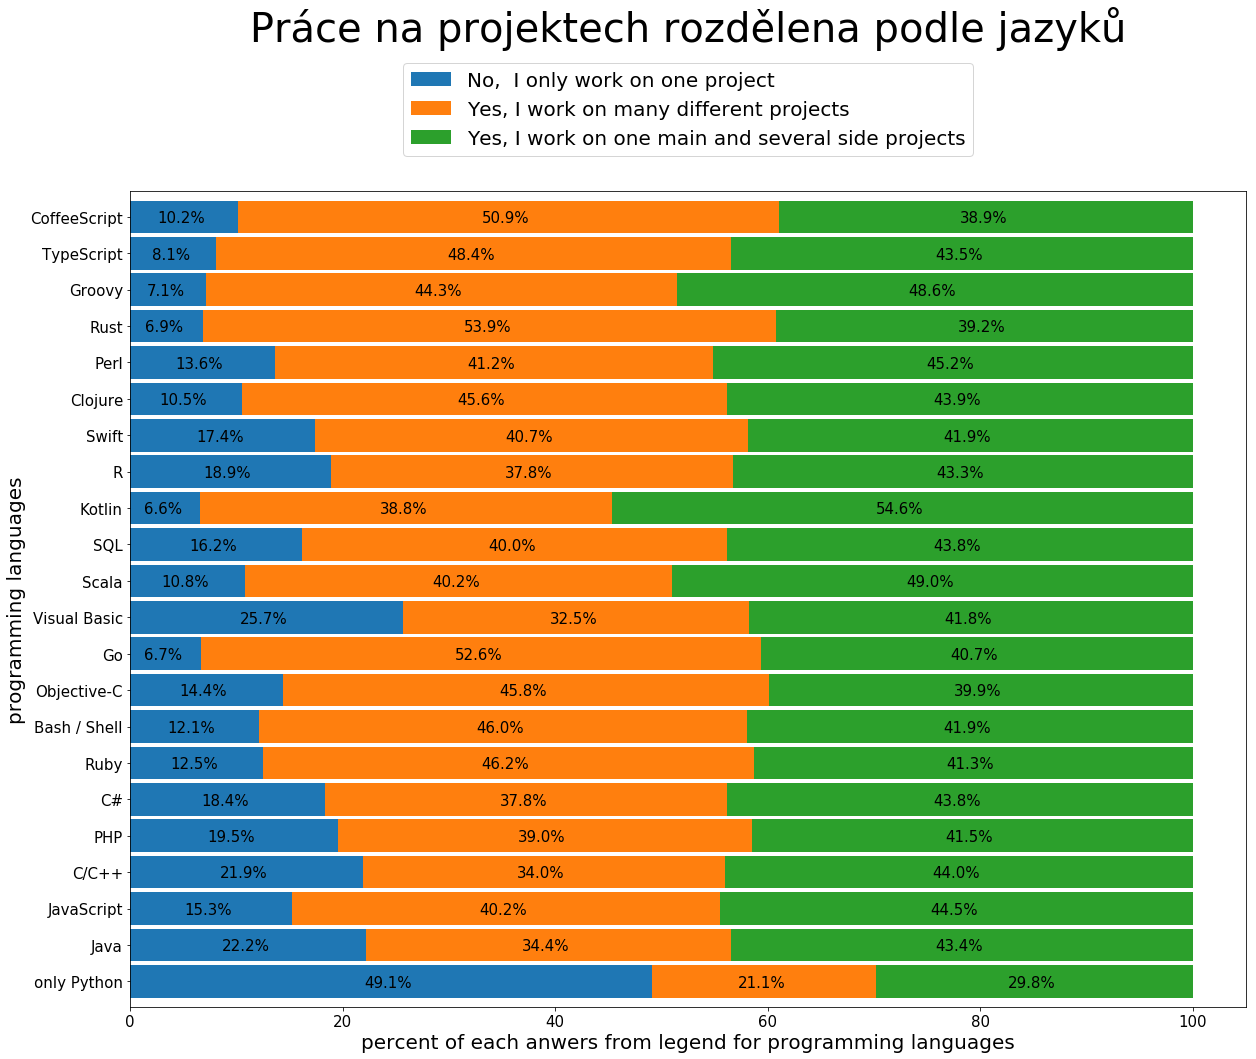

In [6]:
cols = dfLan.columns.tolist()
cols = cols[-1:] + cols[:-1]
dfGra = dfLan[cols]
dfGra = dfGra.iloc[:,:-4]
dfGra.loc[:, 'only Python'] = dfGra.loc[:, 'only Python'].eq(1).mul(1)
# Rename and group by column where is answer on work on multiple projects.
dfGra.rename(columns={ dfGra.columns[-1]: "Work on multiple projects?" }, inplace=True)
sup = dfGra.groupby('Work on multiple projects?').sum()

# Convert to percent
sup = (100 * (sup / sup.sum())).round(10)
# Drop use only Python from previous answers
sup = sup.drop('None', axis=1)

# Transpose and create horizontal stacked bar plot
sup = sup.transpose()
ax = sup.plot.barh(stacked=True, width=0.9, figsize=(20,15));

# Label plot
ax.set_title("Práce na projektech rozdělena podle jazyků", size = 40, pad=150)
ax.legend(loc='center', bbox_to_anchor=(0.5, 1.1), fontsize=20)
plt.ylabel('programming languages',fontsize=20)
plt.xlabel('percent of each anwers from legend for programming languages', fontsize=20)  
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Create label into graph in percent
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x() + i.get_width()/2 - len(str(i.get_width().round(1))+'%')/2, i.get_y()+0.3, \
            str(i.get_width().round(1))+'%', fontsize=15, color='black')
    
# Export plot to file
fig = ax.get_figure()
fig.savefig("projectPlot.pdf")